## Differentially Private Logistic Regression 

### Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Func import *
import copy
import math

### Load Training Data

In [4]:
X_train, y_train = load_data("400.csv")
m,n = X_train.shape

### DP Parameters

In [5]:
G=np.zeros(n)
for i in range(n):
    G[i]=np.amax(X_train[:,i])

In [6]:
G=np.zeros(m)
for i in range(0,399):
    G[i]=np.sqrt(X_train[i,0]**2+X_train[i,1]**2)
G_MAX=max(G)

In [7]:
epsilon=1
delta=0.00001
T=2500
sigma_w=(2*G_MAX/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
sigma_b=(2*1/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
mu=0

### Plot training data

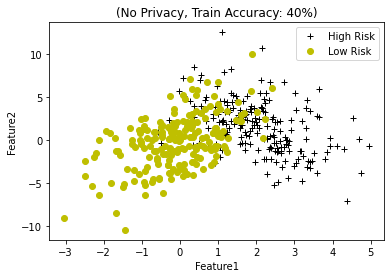

In [8]:
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")
plt.ylabel('Feature2') 
plt.xlabel('Feature1') 
plt.legend(loc="upper right")
plt.title("(No Privacy, Train Accuracy: 40%)")
plt.show()

### Sigmoid Function

In [9]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### Cost Function

In [10]:
def compute_cost(X, y, w, b, lambda_= 1):
   
    m,n = X_train.shape
    loss_sum = 0
    z_wb = 0

    for i in range(m): 
        
        z_wb = np.dot(X[i],w)
        z_wb += b 
        f_wb= sigmoid(z_wb);
        loss = -y[i] * np.log(f_wb+2.71**-20) - (1 - y[i]) * np.log(1 - (f_wb+2.71**-20));
        loss_sum += loss 

    total_cost = (1 / m) * loss_sum 


    return total_cost

### Compute Gradient

In [11]:
def compute_gradient(X, y, w, b, lambda_=None): 
   
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    for i in range(m):
        z_wb = 0
 
        for j in range(n):
            z_wb_ij = w[j]*X[i][j];
            z_wb += z_wb_ij
            
        z_wb += b
        f_wb = sigmoid(z_wb);
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw = dj_dw / m+ np.random.normal(mu, sigma_w)
    dj_db = dj_db / m+ np.random.normal(mu, sigma_b)
 
    return dj_db, dj_dw


### Gradient Descent

In [12]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
   
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:     
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

        
    return w_in, b_in, J_history, w_history 

In [13]:
initial_w =np.array([[2.22468139],[0.19068489]])
initial_w.shape


(2, 1)

### Learning The Parameters

In [14]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8
iterations = T
alpha = 0.001
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.98   
Iteration  250: Cost     3.83   
Iteration  500: Cost     3.66   
Iteration  750: Cost     3.76   
Iteration 1000: Cost     3.15   
Iteration 1250: Cost     2.50   
Iteration 1500: Cost     1.96   
Iteration 1750: Cost     1.63   
Iteration 2000: Cost     1.50   
Iteration 2250: Cost     1.35   
Iteration 2499: Cost     1.46   


## Plot Decision Boundary

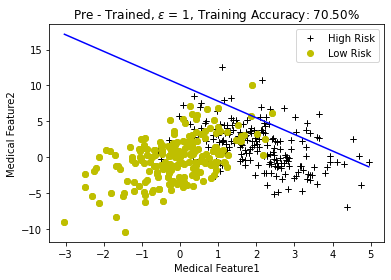

In [15]:
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")


plt.ylabel('Medical Feature2') 

plt.xlabel('Medical Feature1') 
plt.legend(loc="upper right")



plt.title("Pre - Trained, $\epsilon$ = 1, Training Accuracy: 70.50%")

plot_decision_boundary(w, b, X_train, y_train)



### Predict Function

In [16]:
def predict(X, w, b): 
    
   
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
    
        for j in range(n): 
            z_wb_ij = w[j]*X[i][j]
        
            
            z_wb += z_wb_ij
        
     
        z_wb += b
        
        
        f_wb = sigmoid(z_wb)

       
        p[i] = f_wb >= 0.5
        
 
    return p

### Copute Accuracy

In [17]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 54.500000


### Loss VS Iterartion

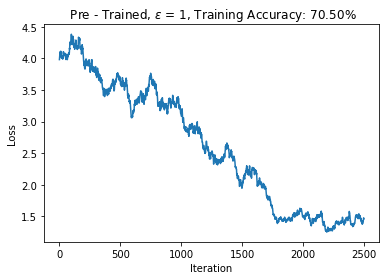

In [18]:
itr=range(T)
plt.ylabel('Loss') 
plt.xlabel('Iteration') 
plt.title(" Pre - Trained, $\epsilon$ = 1, Training Accuracy: 70.50% ")
plt.plot(itr,J_history) 